In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
#Importing the Dataset
dataset=pd.read_csv('/content/car_performance.csv')
dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
#Step 1:Finding missing data if any present in the dataset
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [ ]:
#But a key thing to observe
dataset.iloc[126]
#Horsepower value is ? so we need to impute it
#Simplest way is to impute with the mean

mpg                      21.0
cylinders                   6
displacement            200.0
horsepower                  ?
weight                   2875
acceleration             17.0
model year                 74
origin                      1
car name        ford maverick
Name: 126, dtype: object

In [ ]:
#Replacing first with nan
dataset['horsepower']=dataset['horsepower'].replace('?',np.nan)

In [ ]:
dataset['horsepower'].isnull().sum()

6

In [ ]:
dataset['horsepower']=dataset['horsepower'].astype('float64')

In [ ]:
dataset['horsepower'].fillna((dataset['horsepower'].mean()),inplace=True)

In [ ]:
#Observe now imputation done successfully
dataset.iloc[126]

mpg                      21.0
cylinders                   6
displacement            200.0
horsepower         104.469388
weight                   2875
acceleration             17.0
model year                 74
origin                      1
car name        ford maverick
Name: 126, dtype: object

In [ ]:
#Pandas dataframe.info() function is used to get a quick overview of the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
 #Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.
dataset.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#No use of car name attribute so dropping it
dataset=dataset.drop('car name',axis=1)

In [ ]:
#Statistical step
#Very necessary to find correlation amongst the attributes
corr_table=dataset.corr()
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


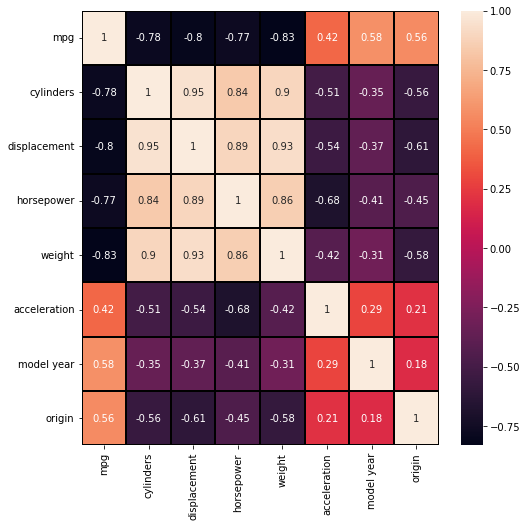

In [ ]:
#Data Visualisations
#1
#To see correlation graphically using heatmap
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)
fig=plt.gcf()
fig.set_size_inches(8,8)


In [ ]:
#Now lets see in better way the strength of correlation in attributes

Using P -value -the probabiltity value that the correlation between two variables is statistically significant.
Now see p value significance
Conventionally,
 p < 0.05 is referred as statistically significant and
  p < 0.001 as statistically highly significant.
  p<0.1 weak evidence that the correlation is significant
  p>0.1 no eviudence that the correlation is significant

In [ ]:
from scipy import stats

In [ ]:
#Calculating the Pearson Correlation coefficient and p-value of 'Cylinders' and 'mpg'

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataset['cylinders'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.7753962854205542  with a P-value of P = 4.503992246177055e-81


Conclusion for above:
P value less than 0.001-statistically highly  significant and hence negative relationship with moderately strong

In [ ]:
#Displacement  vs mpg
pearson_coef, p_value = stats.pearsonr(dataset['displacement'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.8042028248058978  with a P-value of P = 1.6558889101930157e-91


In [ ]:
#Horsepower vs mpg
pearson_coef, p_value = stats.pearsonr(dataset['horsepower'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.7714371350025526  with a P-value of P = 9.255477533166725e-80


In [ ]:
#weight vs mpg
pearson_coef, p_value = stats.pearsonr(dataset['weight'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.831740933244335  with a P-value of P = 2.9727995640500577e-103


In [ ]:
#acceleration vs mpg
pearson_coef, p_value = stats.pearsonr(dataset['acceleration'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4202889121016507  with a P-value of P = 1.823091535078553e-18


In [ ]:
#Model year vs mpg
pearson_coef, p_value = stats.pearsonr(dataset['model year'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5792671330833096  with a P-value of P = 4.844935813365483e-37


In [ ]:
#Origin vs mpg
pearson_coef, p_value = stats.pearsonr(dataset['origin'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5634503597738431  with a P-value of P = 1.0114822102336483e-34


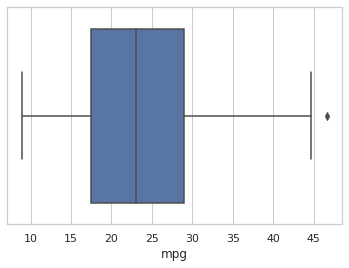

In [ ]:
#Boxplot for five statistical summary
sns.set(style="whitegrid")
sns.boxplot(x=dataset["mpg"])

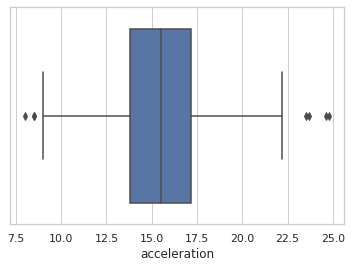

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["acceleration"])

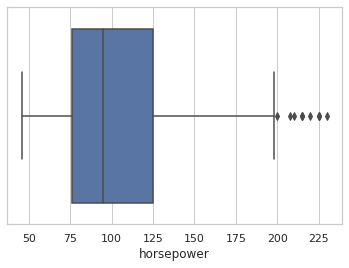

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["horsepower"])

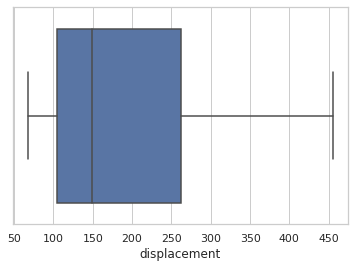

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["displacement"])

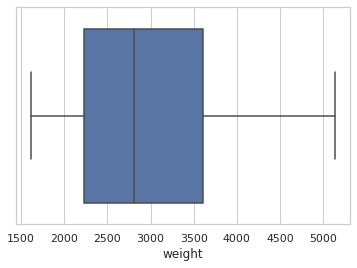

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["weight"])

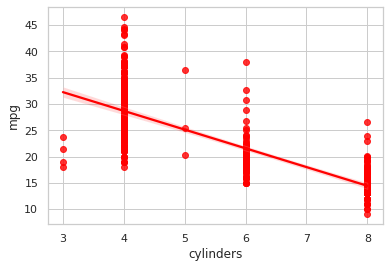

In [ ]:
#To see linear relationship amongst  two attributes so use regression line
sns.regplot(x="cylinders", y="mpg", data=dataset,color="red")

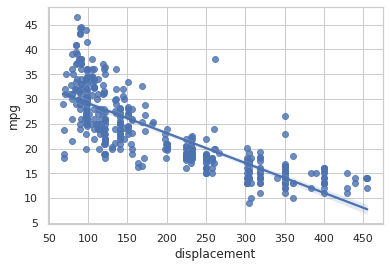

In [ ]:
sns.regplot(x="displacement", y="mpg", data=dataset)

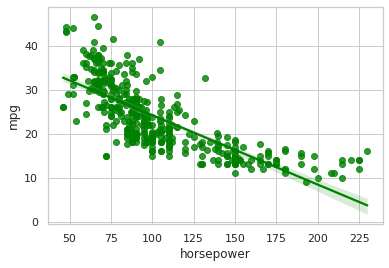

In [ ]:
sns.regplot(x="horsepower", y="mpg", data=dataset,color="green")

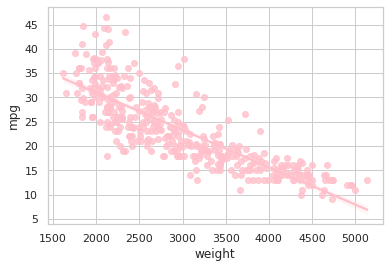

In [ ]:
sns.regplot(x="weight", y="mpg", data=dataset,color="pink")

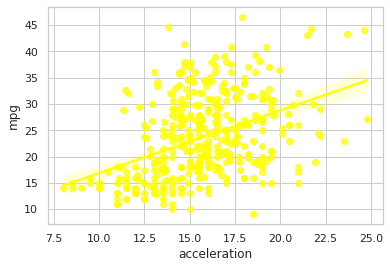

In [ ]:
sns.regplot(x="acceleration", y="mpg", data=dataset,color="yellow")

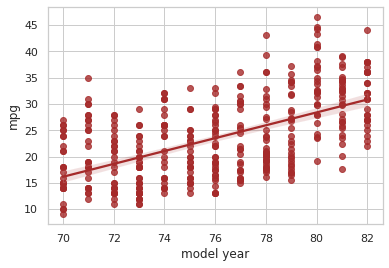

In [ ]:
sns.regplot(x="model year", y="mpg", data=dataset,color="brown")

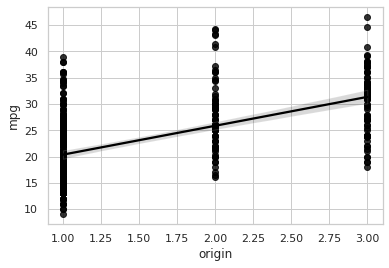

In [ ]:
sns.regplot(x="origin", y="mpg", data=dataset,color="black")

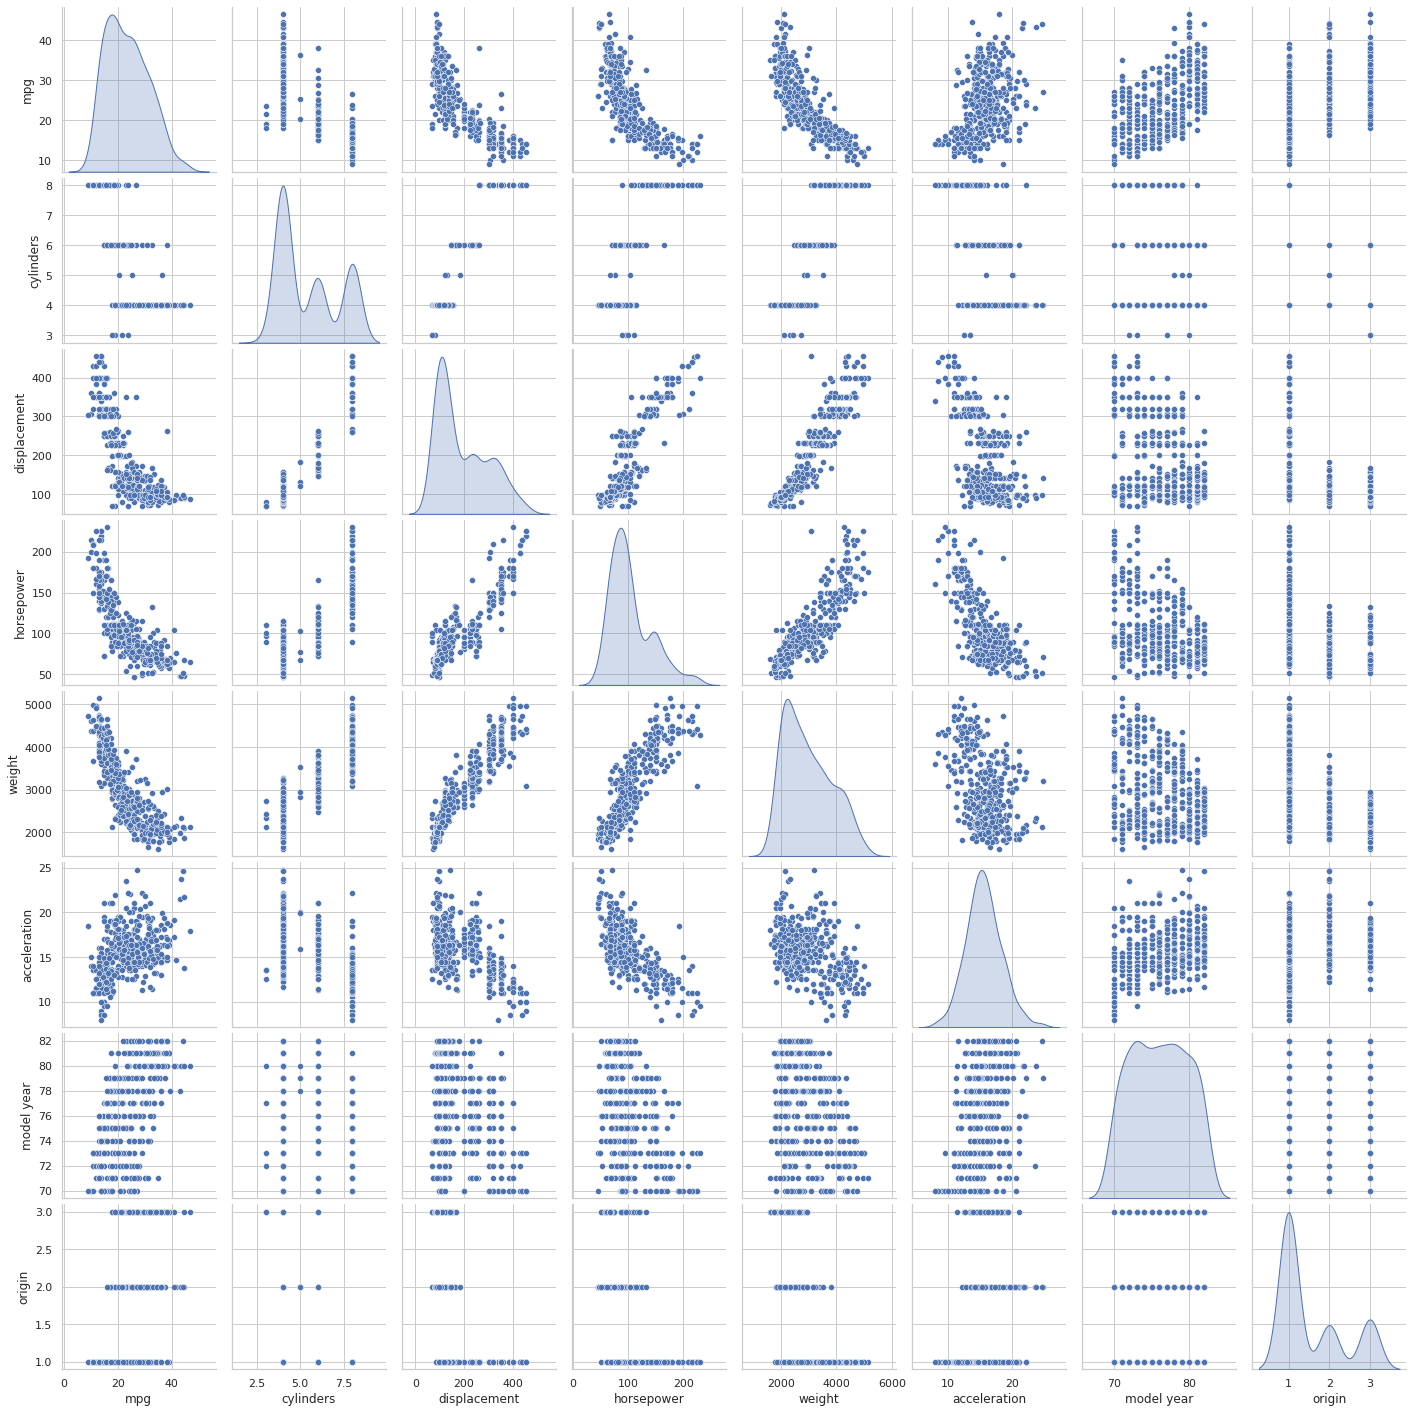

In [ ]:
#Now in gist overall visualisation of all attributes with each other in one frame
sns.pairplot(dataset,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

The below is an interactive data visualisation where hovering over graph is possible

In [ ]:
import plotly.express as px
import pandas as pd
# plotting the scatter chart
fig = px.scatter(dataset, x="model year", y="mpg", color='displacement')
# showing the plot
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
# plotting the scatter chart
fig = px.scatter(dataset, x="weight", y="mpg", color='acceleration')
# showing the plot
fig.show()